# Lab 4
## Review and Folium

Can you believe we're almost halfway through this course? Time sure flies when you're having fun - which I am entirely sure you all are.

Since I know this class moves fast and these concepts are hard, we're going to take a step back this week. We're going to push _most_ of the raster work down the line a bit, isntead focusing this week on putting the core concepts you've learned together to perform spatial analysis and geovisualization. We'll also introduce the concept of a **random walk** _(sometimes called a drunken walk)_ and even begin to push things 'to the web' using the [Folium library](https://github.com/python-visualization/folium), a python 'wrapper' for [leaflet.js](https://leafletjs.com/). 

While that might sound like a lot, don't worry. It'll be fairly straightforward. This is about thinking through the **acquisition, analysis, and visualization** of data.

### Note: I'm going to assume you can install libraries at this point; however, folium isn't registered on any of the standard conda channels - so, use `pip install folium` to install it.

`pip` is another package manager, it's _generally_ 'better' to use `conda` with Anaconda (for reasons that should be obvious), but `pip` works in a pinch.

## Introducing GeoPandas and Folium

Before we go any further, you'll need to install geopandas.
In conda, you can do so with a `conda install geopandas` command from within your virtual environment. 

So, you'll want to create a lab4 environment if you have not already done so (`conda create -n lab4`).
Then, you'll want to install geopandas (`conda install geopandas`)
And, while we're at it, let's install folium as well (`pip install folium`)

You'll need to do this all from your anaconda prompt (not your python interpreter!) and you'll need to run that from administrator! If you have any problems, ask around! We went over this last week and you can also find various guides online!

Let's check to see how you are doing.

In [9]:
import folium, geopandas
%matplotlib inline

If the above cell runs without error, congratulations, you have installed geopandas.
The second line tells matplotlib (a plotting library) that we want our maps to appear 'inline' (here in the notebook).

Let's get started!

_GeoPandas_ is essentially a miniature, python-based, open-source GIS. It achieves much of its functionality by wrapping (making use of) existing non-spatial libraries, adding some GIS-specific aspects along the way.

The most powerful new data type introduced by _GeoPandas_ is the _GeoDataFrame_ (specific instances of such data types sometimes have _gdf_ in their variable names, you might notice.) The _GeoDataFrame_ builds spatial functionality into the _DataFrame_--which is a data type introduced in the (non-spatial) data science package called _Pandas_. Pandas dataframes have similarities to a central data type in the language _R_.

A _GeoDataFrame_ is essentially a big spatial database table of the sort you see in the results of this next code cell. It bears some similarities to ArcGIS's tables, but certain simpler manipulations of tables are much easier within python. You don't need cursors and the syntax is often less tortured; additionally, operations in GeoDataFrame often have built in loops and iteration.

In the next cell, we are going to load up a polygon-based dataset of countries in the world. It is included with GeoPandas and comes from the free dataset found at http://www.naturalearthdata.com

In truth, behind the scenes, GeoPandas is using another spatial data library for python called Fiona which is itself using the open-source GDAL/OGR libraries (we'll spend some time with those in a bit). You can read more about that here: http://geopandas.org/io.html

***Again, the key thing to remember here is that while the syntax (and tools) are different than ArcGIS, the concepts are the same.***

We're going to load and query some data. We'll then use the .head(7) method to then display the first seven entries of the database.

In [4]:
import geopandas

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
    # NaturalEarth is a free dataset that comes with geopandas.
    #    See: http://www.naturalearthdata.com/ 
    # We could have just used a string with the filename of a shapefile there,
    #    instead of geopandas.datasets.get_path('naturalearth_lowres').

world.head(7) # show us the data for the first seven polygons (countries) in the file

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...


If you look above, you'll see a population column (pop_est) and a GDP column (gdp_md_est - md stands for "millions of dollars".

Let's create a new column that is a GDP per person estimate. This will take a single line of code (compare that to doing the same task in Arc).

In [5]:
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000

world.head(7)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",784.154930
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,8617.663491
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",5992.658787
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",38407.907819
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,14027.126052
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",6326.246948
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,200000.000000


In [6]:
#This lets you see what the column names are

world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'gdp_per_cap'],
      dtype='object')

In [7]:
#We can call the columns we wish to display like so.

(world[['name', 'gdp_per_cap']]).head(10)

,name,gdp_per_cap
0,Afghanistan,784.154930
1,Angola,8617.663491
2,Albania,5992.658787
3,United Arab Emirates,38407.907819
4,Argentina,14027.126052
5,Armenia,6326.246948
6,Antarctica,200000.000000
7,Fr. S. Antarctic Lands,114285.714286
8,Australia,37634.083179
9,Austria,40132.609347


In [6]:
#Or the .iloc() method lets us select a single (range of) rows

world.iloc[30]

pop_est                                              1.33861e+09
continent                                                   Asia
name                                                       China
iso_a3                                                       CHN
gdp_md_est                                             7.973e+06
geometry       (POLYGON ((110.3391878601516 18.67839508714761...
gdp_per_cap                                              5956.17
Name: 30, dtype: object

Ok, but let's do some spatial stuff, huh?

How about a choropleth map based on per capital gdp?

C:\Users\ryanj\AppData\Local\conda\conda\envs\lab4\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


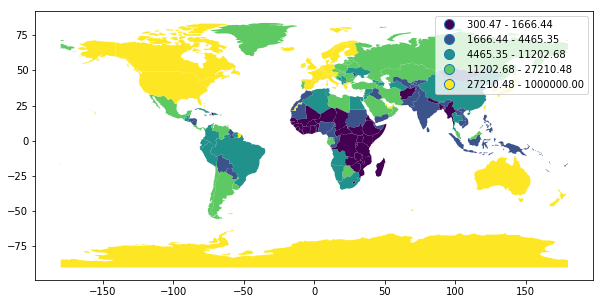

In [8]:
world.plot(column="gdp_per_cap",scheme='quantiles',k=5,legend=True,figsize=(10,5))

### Did you get a deprecation error? Note it. This is the_downside_ of relying on lots of interdependent libraries. Sometimes they'll stop working with one another!

Technically, it already _should_ have stopped working. But, it hasn't and also GeoPandas knows about this and is planning to change, so let's not worry too much for now.

Let's reproject the data and change the 'colormap'

Here, we are borrowing functionality from fiona, another geospatial python library.

Fiona is actually a python wrapper for gdal/ogr. See: http://toblerity.org/fiona/manual.html

In particular, we want to get a Coordinate Reference System string that will correspond to a
specific Euler projection defined in a 'proj4' format string: "+proj=euler +lat_1=67 +lat_2=75"

Once we have put the projection into a format GeoPandas can understand, we can reproject the existing GeoDataFrame. The _inplace=True_ in the code below means the existing GeoDataFrame called 'world' is modified, instead of us needing to assign the result of the method/function to a new variable.

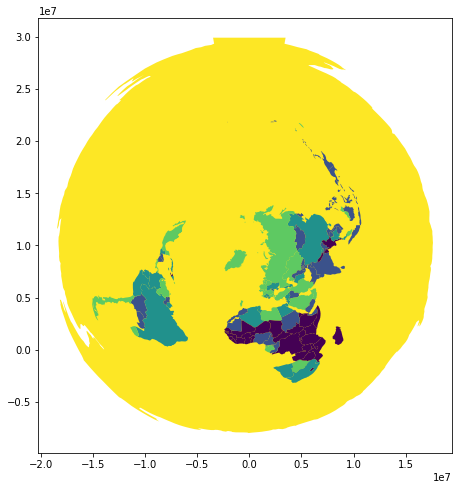

In [9]:
import fiona
import fiona.crs
EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)

world.plot(column="gdp_per_cap",scheme='quantiles',k=5,figsize=(8,8))

### Uh oh, something went wrong. Can you figure out what it is?

...Antarctica has been flipped inside-out! The interior of Antarctica is now covering the whole planet and what used to be the interior of Antarctica is now an ocean. Oops! This is a result from the interaction of our particular data, the projection, and the drawing algorithm. The easiest way to revolve this issue is to remove Antarctica...

In [10]:
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]

That single line above created a geoDataFrame **without** Antarctica in it.
It is, in essence, a select by attribute query done in a single line of code.

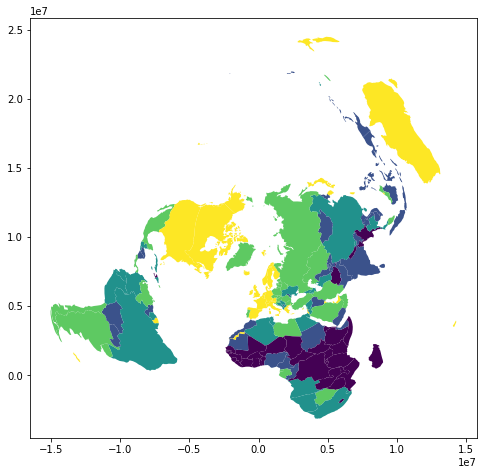

In [11]:
polarplot = worldWithoutAntarctica.plot(
    column="gdp_per_cap",
    scheme='quantiles',k=5,
    figsize=(8,8))

### Ok, this is getting long.
And I want you to start playing with some data, but I want to show you one more thing in geopandas. I am going to load in a point layer of cities data. I am then going to do a **select by location** where we select only cities in countries with a per capita GPD greater than 30000.

I will display those cities on the map.

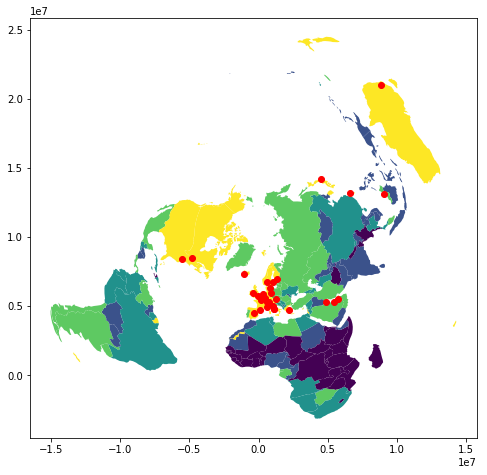

In [12]:
#Just setting the 'base' for my map below (this could be called anything)
base = worldWithoutAntarctica.plot(
    column="gdp_per_cap",
    scheme='quantiles',k=5,
    figsize=(8,8))



#Much like the countries data, I am using an included layer of cities.
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

#Now I am going to reproject the cities data
cities.to_crs(crs=EulerCRS, inplace=True)

#Time for a spatial join
cities_gdp = geopandas.sjoin(cities, worldWithoutAntarctica, how='inner', op='within')

#and the finale
cities_gdp[cities_gdp['gdp_per_cap']>30000].plot(ax=base, color='red')



## The last cell is complicated! Take some time to talk through it. What am I doing at each line?

### You'll want to keep what I did up there in the back of your mind for the problems below.

That's not the prettiest map and the syntax can be a bit confusing (do you see how I nest my selection of 'greater than 30000' in there?).

But, that's a very simple demonstration of the power of GeoPandas to manipulate and visualize spatial data.

### Pretty swanky. 

Now, let's create some points in GeoPandas and then put them on the map.
How about one roughly near UWT and one up near Proctor.

To do this, I'm going to pretend you have a bit of 'data' in a specific format, then I'll walk through how we convert that format into something GeoPandas can handle programmatically. It's a bit contrived, as you'll see, but think about how you might - *I don't know* - just read in various files and parse them in this way.

In [3]:
import geopandas

data = [['UWT', '47.246613', '-122.438813'], ['UPS','47.263660','-122.482941']]

geo = geopandas.GeoDataFrame(data, columns=['name','lat','long'])

print(geo)

geo.plot()

  name        lat         long
0  UWT  47.246613  -122.438813
1  UPS  47.263660  -122.482941


AttributeError: No geometry data set yet (expected in column 'geometry'.

## Hey, what's going on?

Look at the bottom there. There's no valid geometry column, GeoPandas can't recognize the separate lat and long entries.

Let's do this again:
1. Make a Pandas Dataframe
2. Make a GeoSeries (this is like a fancy list that GeoPandas uses for geometry) with our coordinates
3. Make a GeoDataFrame that has the GeoSeries for geometry and the DataFrame as our attribute data
4. Map it on a slippy map


In [2]:
import shapely, shapely.geometry, fiona, fiona.crs, pandas, folium

data = [['UWT', 47.246613, -122.438813], ['UPS',47.263660,-122.482941]]

panda = pandas.DataFrame(data, columns=['name','lat','long'])
print(panda)

#Here I use the zip function to basically... 'zip' two list items into one.
#Find out more here: https://docs.python.org/2/library/functions.html#zip
coords = zip(panda['long'], panda['lat'])

#I am going to collapse a for loop into a single line here, watch how

geometry = [shapely.geometry.Point(c) for c in coords]
#Shapely is a library with the point data type GeoPandas uses for coordinates

#Now, I'm going to make that geometry into a GeoSeries
geolist = geopandas.GeoSeries(geometry)

#Ok, let's put it all together.
geoPoints = geopandas.GeoDataFrame(
        panda,
        geometry=geolist)

#And now, TO A WEB MAP
geoPoints.crs=fiona.crs.from_epsg(4236) #What am I doing here? Why?

m2 = folium.Map(
                location=[47.2529, -122.4443],
                zoom_start=11,
                tiles='Stamen Terrain')

twopoints = folium.features.GeoJson(geoPoints.to_json()).add_to(m2)

m2


  name        lat        long
0  UWT  47.246613 -122.438813
1  UPS  47.263660 -122.482941


NameError: name 'geopandas' is not defined

That map object is actually in html, unlike a arcgis api 'map' object that requires arc to run, that'll just run on any old machine. Below I'll export it as html and you can take a look (this will just save to whatever directory in which you have the notebook).

In [15]:
m2.save('example.html')

## Question 1

Write a script that calculates the distance between the UWT and UPS points used above in **any** linear unit.
#### Bonus: Calculate the distance in feet (+2 pts)

**hint**: Look into the GeoPandas .distance() method. But, also, consider how GeoPandas calculates it. You cn find a good stack exchange answer on this [here](https://gis.stackexchange.com/questions/166675/what-units-are-used-by-geopandas-shapely-area-and-distance-functions).

In [6]:
import shapely, shapely.geometry, fiona, fiona.crs, pandas, folium

data = [['UWT', 47.246613, -122.438813], ['UPS',47.263660,-122.482941]]

panda = pandas.DataFrame(data, columns=['name','lat','long'])
print(panda)

#Here I use the zip function to basically... 'zip' two list items into one.
#Find out more here: https://docs.python.org/2/library/functions.html#zip
coords = zip(panda['long'], panda['lat'])

#I am going to collapse a for loop into a single line here, watch how

geometry = [shapely.geometry.Point(c) for c in coords]
#Shapely is a library with the point data type GeoPandas uses for coordinates

#Now, I'm going to make that geometry into a GeoSeries
geolist = geopandas.GeoSeries(geometry)

#Ok, let's put it all together.
geoPoints = geopandas.GeoDataFrame(
        panda,
        geometry=geolist)

#And now, TO A WEB MAP
geoPoints.crs=fiona.crs.from_epsg(4236) #What am I doing here? Why? UTM Projection

#change projection to get accurate distance measurement
geoPoints.to_crs(epsg=3310,inplace=True)

map = folium.Map(
                location=[47.2529, -122.4443],
                zoom_start=11,
                tiles='Stamen Toner')

twopoints = folium.features.GeoJson(geoPoints.to_json()).add_to(map)

#distance measure in both meters (default) and feet
distance = geoPoints.distance(geoPoints.shift())
d_ft = distance / 0.3048
print(distance, 'meters')
print(d_ft, 'feet')

  name        lat        long
0  UWT  47.246613 -122.438813
1  UPS  47.263660 -122.482941
0            NaN
1    3872.180527
dtype: float64 meters
0             NaN
1    12704.004355
dtype: float64 feet


## Question 2


Take the natural earth cities layer that we worked with earlier and convert it into a folium map.
#### Bonus: Make it a choropleth map on the GDP per capita field (you may have to recreate that as we did above) +2 pts, partial credit possible.

In [5]:
import shapely, shapely.geometry, fiona, fiona.crs, pandas, folium

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000

map = folium.Map(
                location=[14.5994, -28.6731],
                zoom_start=2,
                tiles='cartodbpositron')

world = folium.features.GeoJson(world.to_json()).add_to(map)

map

# Boom!

Great job so far. As a general strategy, you increasingly have a number of 'tools' at your disposal. Sometimes one will be better at something than another! Sometimes, simply put, you'll only know how to do something in one and something else in another - *that's ok*. The strength of moving beyond the desktop ecosystem is that you can leverage the tools that make the most sense at a given time; mix and match what works for you to produce powerful, unique geospatial technologies.

Let's do one last question where we introduce a powerful concept - the [*random walk*](https://en.wikipedia.org/wiki/Random_walk).

The history of the random (or 'drunken') walk is pretty interesting in and of itself. You can find a chapter of _Spatial Simulation_ (a pretty amazing book) uploaded to canvas on the topic [here](https://canvas.uw.edu/courses/1262246/files/folder/week%204). Of course, that's in NetLogo (a different language), but it discusses the concept in some detail. In fact, if you get into agent-based modeling or spatial simulations in general, there are few better books than that one!

**Basically**, a random walk is just a simulation wherein an 'agent' starts at some location (x, y) and then takes a number of steps in a random direction. You can then calculate things like distance from start point vs. total distance traveled and the like. This type of modeling is used *all the time* in a variety of contexts (city planning, economics, video game design, etc.). Heck, there's a whole book about this [idea](https://www.amazon.com/Drunkards-Walk-Randomness-Rules-Lives/dp/0307275175/ref=sr_1_1) (_I haven't read it, no recommendation given_).

In python, we're going to use the [random](https://docs.python.org/2/library/random.html) module to generate (pseudo)random numbers that will move our imaginary 'friend' along their path (you can read about why they are pseuo-random if you like).

The next cell will generate ten integers between the values of 1 and 4.

In [21]:
import random

x = 1
while x <= 10:
    print(random.randint(1,4))
    x +=1

3
4
1
1
4
4
2
4
2
3


### Question 3: (Not) going home?

I want you to produce a 'random walk.' It's not quite random due to the constraints I'm going to put on it *and* due to the pseudorandom nature of generating the numbers, but it's going to force you to think through the basic ideas of this algorithm.

You are going to write a 'simulation' of a random walk wherein our walker takes up to 10,000 steps to try to find their way home. You'll then calculate how far they are from where they started and how far they are from their destination. 

Specifically, your script will:

1. Begin at (-122, 47)
2. Have a home at (-71, 42)
3. Your walker moves random following these rules: Each step is one unit wrong and takes place in one of four directions. In other words, with each step your walker will increase or decrease x or y by 1.
4. After 10,000 steps or arriving at (-71, 42) the walk ends immediately. 
5. When the walk ends, you will print out: total steps taken, end location, distance from start location, distance from home location.

**hint**: You can approach this by creating a class or two (with methods) or by writing functions and using a loop. The former is more expandable (and might be useful later if we return to this method), the latter is likely more straightforward. (Really, you should probably be using a generator, but that stuff gets weird fast in my opinion).

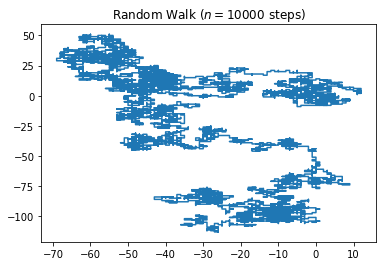

In [23]:
import numpy 
import pylab 
import random 
  
#number of steps 
n = 10000
  
#creating x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
#random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
#plotting stuff
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=1000) 
pylab.show() 

## Bonus Question 1: Well, where did we go?

Create an interactive web map (so the output is  leaflet map through folium) to put your random walker onto a world map.

In other words, I want a line that represents the path of the walk with markers (points) at its beginning and end.

You can use **any** of the libraries at your disposal to prepare this (and, in fact, it can be done using folium directly, the arcgis api, or geopandas) - use what makes sense to you.

### +2 pts, partial credit possible.
